In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import seaborn as sns

In [93]:
filepath = "E:/Old Downloads Folder/Research Stuff/Jupyter Notebooks/Coordination Analysis Data/New_York_Sample"

with open(filepath) as f:
    
    frame = pd.read_csv(f, sep = ' ', skiprows = [0, 1], usecols = [0, 1], names = ['x', 'y'])
    
frame

,x,y
0,0.0002,0.000000
1,0.0006,0.000000
2,0.0010,0.000000
3,0.0014,0.000000
4,0.0018,0.000000
...,...,...
495,0.1982,28.386883
496,0.1986,29.961221
497,0.1990,31.442286
498,0.1994,33.319706


Text(0.5, 1.0, 'Before Smoothing')

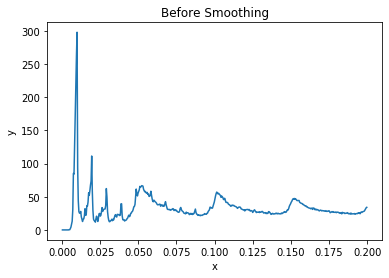

In [94]:
plt.figure()

sns.lineplot(x = frame['x'], y = frame['y']).set_title('Before Smoothing')

Text(0, 0.5, 'y')

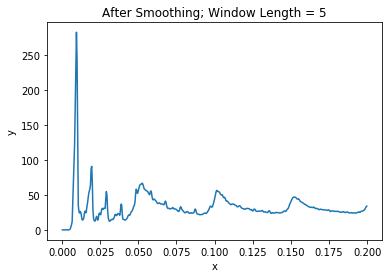

In [95]:
i = 5

yhat = savgol_filter(frame['y'], window_length = i, polyorder = 3)
    
ax = sns.lineplot(x = frame['x'], y = yhat)
ax.set_title('After Smoothing; Window Length = ' + str(i))
ax.set_ylabel('y')

In [96]:
changed_frame = frame.copy()
changed_frame['y'] = yhat
changed_frame

,x,y
0,0.0002,0.000000
1,0.0006,0.000000
2,0.0010,0.000000
3,0.0014,0.000000
4,0.0018,0.000000
...,...,...
495,0.1982,28.543878
496,0.1986,29.823877
497,0.1990,31.619414
498,0.1994,33.201621


In [104]:
def findFirstPeak(dataframe, convergeVal):
    
    maxVal = frame['y'].max()
    gate = 1/2*(maxVal - convergeVal)
    prev_val = 0
    passGate = False
    
    for index, data in dataframe.iterrows():

        y_val = data['y']

        if y_val < gate and prev_val > gate:

            passGate = True

        if passGate == True:

            if prev_val < y_val:

                return (index)

        prev_val = y_val
        
print(findFirstPeak(changed_frame, 25))

29


In [108]:
print(changed_frame[:29])

print(frame[:29])

         x           y
0   0.0002    0.000000
1   0.0006    0.000000
2   0.0010    0.000000
3   0.0014    0.000000
4   0.0018    0.000000
5   0.0022    0.000000
6   0.0026    0.000000
7   0.0030    0.000000
8   0.0034    0.000000
9   0.0038   -0.029309
10  0.0042    0.090271
11  0.0046    0.099172
12  0.0050    0.597182
13  0.0054    1.773740
14  0.0058    4.787451
15  0.0062    7.642838
16  0.0066   12.238755
17  0.0070   40.387781
18  0.0074   68.322513
19  0.0078   97.046759
20  0.0082  123.918221
21  0.0086  174.308982
22  0.0090  220.078371
23  0.0094  282.885433
24  0.0098  243.428463
25  0.0102  137.794938
26  0.0106   35.223733
27  0.0110   27.002036
28  0.0114   24.199014
         x           y
0   0.0002    0.000000
1   0.0006    0.000000
2   0.0010    0.000000
3   0.0014    0.000000
4   0.0018    0.000000
5   0.0022    0.000000
6   0.0026    0.000000
7   0.0030    0.000000
8   0.0034    0.000000
9   0.0038    0.000000
10  0.0042    0.000000
11  0.0046    0.341936
12  0.0050 